In [1]:
import os
import sys

import matplotlib.pyplot as plt
import torch
from omegaconf import OmegaConf

sys.path.append('../../')

from torchok.constructor.config_structure import DataParams
from torchok.constructor.constructor import Constructor

C:\Users\Vyacheslav\miniconda\envs\torchok\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_images(imgs, names=None, axs=None, show=True, nrows=None, ncols=None, figsize=(16, 8)):
    if not isinstance(imgs, list):
        imgs = [imgs]

    from math import ceil
    if nrows is None and ncols is None:
        nrows = 1
        ncols = len(imgs)
    elif nrows is None:
        nrows = ceil(len(imgs) / ncols)
    elif ncols is None:
        ncols = ceil(len(imgs) / nrows)

    if axs is None:
        fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    if nrows == 1 and ncols == 1:
        axs.imshow(imgs[0])
        axs.set_axis_off()
        if names and len(names) > 0:
            axs.set_title(names[0], fontsize=15)
    elif nrows == 1 or ncols == 1:
        for j, ax in enumerate(axs):
            ax.imshow(imgs[j])
            ax.set_axis_off()
            if names and j < len(names):
                ax.set_title(names[j], fontsize=15)
    else:
        for j, ax in enumerate(axs):
            for k, sub_ax in enumerate(ax):
                image_id = j * ncols + k
                sub_ax.set_axis_off()
                if image_id < len(imgs):
                    sub_ax.imshow(imgs[image_id])
                    if names and image_id < len(names):
                        sub_ax.set_title(names[image_id], fontsize=15)
    if show:
        plt.show()

In [3]:
os.environ['HOME'] = './'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Path to yaml
config_path = '../configs/segmentation_sweet_pepper.yaml'
# Load yaml
config = OmegaConf.load(config_path)['data']['TRAIN'][0]
OmegaConf.resolve(config)
schema = OmegaConf.structured(DataParams)
config = OmegaConf.merge(schema, config)

constructor = Constructor(config)
constructor

In [4]:
dataset = Constructor._create_dataset(config.dataset)
dataset

Files already downloaded and verified


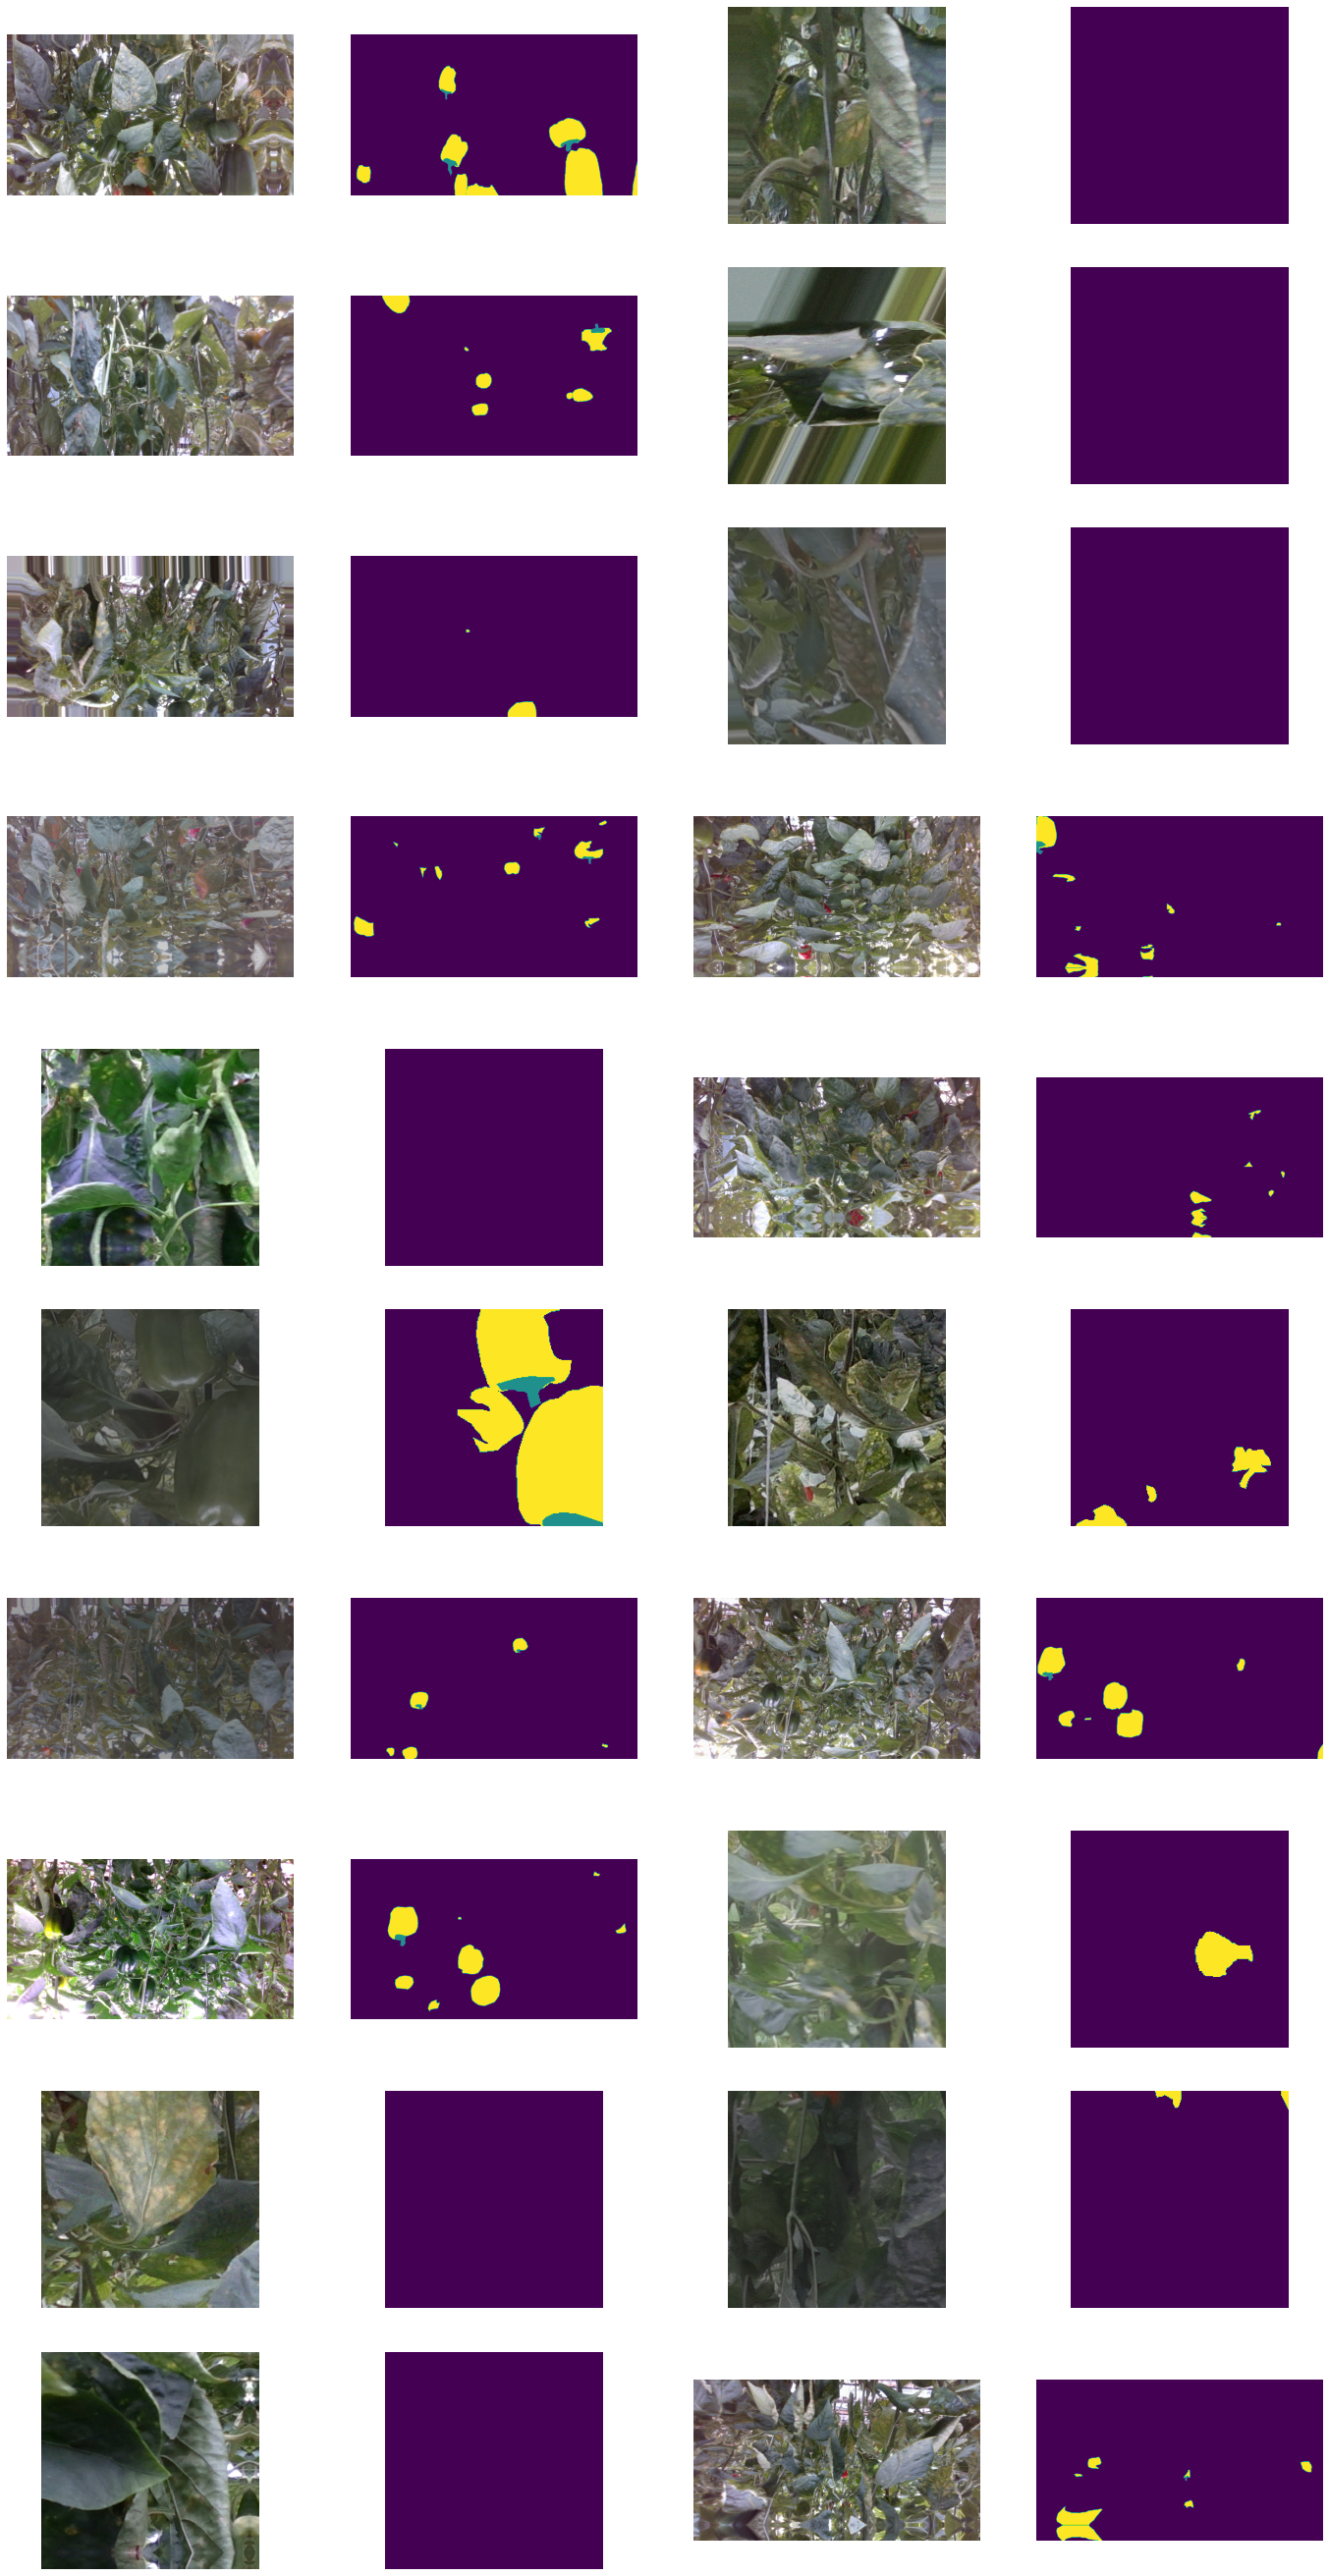

In [13]:
start_idx = 400
n_imgs = 20
n_cols = 4

targets = []

for i in range(n_imgs):
    sample = dataset.get_raw(start_idx + i)
    targets.append(sample['image'])
    targets.append(sample['mask'])

plot_images(targets, ncols=n_cols, figsize=(24, 48))